## MLP with TensorFlow 2.0
The objective of the exercise is to implement computational graphs in TensorFlow 2.0 to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

If you get this error in the execution of the first cell: ` ModuleNotFoundError: No module named 'tensorflow' `, it probably means TensorFlow 2.0 is not installed yet on your machine.

In [1]:
#############################
# MNIST Dataset Preparation #
#############################

# !pip install --upgrade tensorflow
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
print(tf.__version__)

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

2.0.0
MNIST data set ready. N=60000, D=784, n_classes=10


In [0]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0,len(data))  # create an array of index values
    np.random.shuffle(idx)        # shuffle it
    idx = idx[:num]               # take the first n indexes = size of batch
    data_shuffle = data[idx]      # extract the batch using the random indexes
    labels_shuffle = labels[idx]  # extract the labels using the random indexes
    return data_shuffle, labels_shuffle

In [3]:
##################
# Training phase #
##################

E = 100                # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_train(x, y, alpha):
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    h = tf.nn.relu(tf.matmul(x, w1) + b1)  # output of first layer after ReLu activation
    y_pred = tf.nn.sigmoid(tf.matmul(h, w2) + b2) # output of second layer after sigmoid activation
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    diff = y_pred - y
    loss = tf.reduce_mean(tf.pow(diff, 2))
    # define the gradients
    grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(ys = loss, xs = [w1, b1, w2, b2])
    # compute the new values of the gradients with the assign method (see slides)
    w1.assign(w1 - alpha * grad_w1)
    b1.assign(b1 - alpha * grad_b1)
    w2.assign(w2 - alpha * grad_w2)
    b2.assign(b2 - alpha * grad_b2)
    return y_pred, loss

# Init the tf.Variables w1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.random.truncated_normal((D, H), stddev = 0.1, dtype='float64'))
b1 = tf.Variable(tf.constant(0.0, shape=[H], dtype='float64'))
w2 = tf.Variable(tf.random.truncated_normal((H, y_train.shape[1]), stddev = 0.1, dtype='float64'))
b2 = tf.Variable(tf.constant(0.0, shape=[y_train.shape[1]], dtype='float64'))

# Run the computational graph
start_time = time.time()
J = [] # to store the evolution of loss J for each epoch
for epoch in range(E):
    J_epoch = 0.0
    for _ in range(int(N/B)): # number of batches to visit for 1 epoch
        # get batches calling the next_batch method provided above
        x_train_batch, y_train_batch = next_batch(B, x_train, y_train)
        with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
            # call the graph with the batched input, target and alpha A
            out = mlp_train(x_train_batch, y_train_batch, A)
        y_pred, loss_val = out
        J_epoch += loss_val
    J.append(J_epoch)
    print("epoch = {}, loss = {}".format(epoch, J_epoch))
print("--- %s seconds ---" % (time.time() - start_time))

epoch = 0, loss = 54.075217778195395
epoch = 1, loss = 41.156742046547116
epoch = 2, loss = 38.47463210064205
epoch = 3, loss = 36.05502598850983
epoch = 4, loss = 33.996690612829596
epoch = 5, loss = 31.93566864431448
epoch = 6, loss = 30.28895269896571
epoch = 7, loss = 28.556498495782247
epoch = 8, loss = 27.21838749431927
epoch = 9, loss = 25.920797693116057
epoch = 10, loss = 24.880155141782236
epoch = 11, loss = 23.981620197128926
epoch = 12, loss = 23.07149523805471
epoch = 13, loss = 22.343894192918118
epoch = 14, loss = 21.588484942950398
epoch = 15, loss = 20.996258175080644
epoch = 16, loss = 20.194680902432395
epoch = 17, loss = 19.733835737132548
epoch = 18, loss = 19.202154821347328
epoch = 19, loss = 18.816095110919317
epoch = 20, loss = 18.427227345111074
epoch = 21, loss = 17.913459123495155
epoch = 22, loss = 17.60419033589362
epoch = 23, loss = 17.329310769490633
epoch = 24, loss = 17.028078743518968
epoch = 25, loss = 16.602135234579485
epoch = 26, loss = 16.3642241

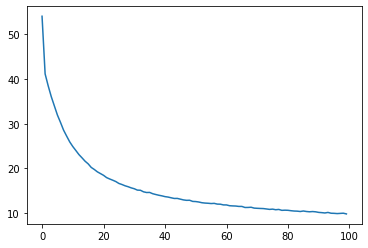

In [4]:
# Plot the evolution of the loss
plt.plot(J)
plt.show()

In [5]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_test(x, y):
    h = tf.nn.relu(tf.matmul(x, w1) + b1)
    y_pred = tf.nn.sigmoid(tf.matmul(h, w2) + b2)
    return y_pred

# Run the computational graph
with tf.device('/CPU:0'):  # change to /GPU:0 to move it to GPU
    y_pred_test = mlp_test(x_test, y_test)

print('Forward pass on test set done.')
# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

Forward pass on test set done.


In [6]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# samples  : ', N_test)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# samples  :  10000
# correct  :  9028
# missed   :  972
accuracy   :  90.28 %
error rate :  9.72 %


## MLP with Keras

2.0.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1331 - accuracy: 0.2241
Epoch 2/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0892 - accuracy: 0.3992
Epoch 3/100
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0837 - accuracy: 0.4669
Epoch 4/100
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0796 - accuracy: 0.5031
Epoch 5/100
60000/60000 [==========================

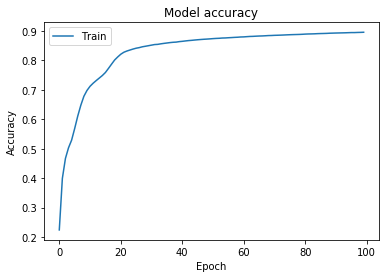

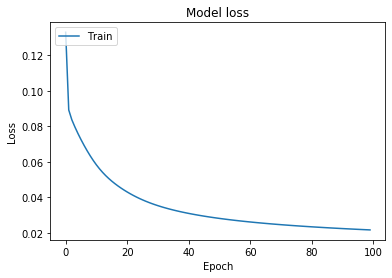

--- 342.0346541404724 seconds ---


In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

E = 100               # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

start_time = time.time()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=H, input_shape=(D,), activation='relu'))
model.add(tf.keras.layers.Dense(units=y_train.shape[1], activation='sigmoid'))

model.summary()

sgd = tf.keras.optimizers.SGD(learning_rate=A)

model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=B, epochs=E)

model.evaluate(x_test, y_test, verbose=2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print("--- %s seconds ---" % (time.time() - start_time))

The accuracy is similar in both models. in TensorFlow with the "low level" functions the accuracy is 90.28%, thus an error of 9.72%. The Keras model has an accuracy of 90.34%. The only big difference is the calculation time. With the "low level" functions the calculation took 673 seconds and in the keras model 347 seconds, almost twice as fast. 
